In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import offsetbox
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import proj3d
from sklearn.decomposition import PCA, KernelPCA
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors
from sklearn.manifold import MDS, Isomap
from sklearn.manifold import LocallyLinearEmbedding as LLE
import glob
from PIL import Image
import cv2
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
import warnings

# Methods definitions

In [2]:
def perform_pca(data, number_of_components=None, scale=False):
    
    if scale:
        scaler = StandardScaler()
        data = scaler.fit_transform(data)

    pca = PCA(n_components=number_of_components)
    components = pca.fit_transform(data)
    components_dataframe = pd.DataFrame(data=components)
    
    return components_dataframe, pca

def perform_kernel_pca(data, number_of_components=None, scale=False):
    
    if scale:
        scaler = StandardScaler()
        data = scaler.fit_transform(data)

    kpca = KernelPCA(kernel="rbf", n_components=number_of_components)
    components = kpca.fit_transform(data)
    components_dataframe = pd.DataFrame(data=components)
    
    return components_dataframe, kpca

def perform_mds(data, number_of_components, scale=False):
    # performing mds
    #MDS(n_components=2, metric=True, n_init=4, max_iter=300, verbose=0, 
    #eps=0.001, n_jobs=None, random_state=None, dissimilarity=’euclidean’)[source]
    
    if scale:
        scaler = StandardScaler()
        data = scaler.fit_transform(data)
    
    mds = MDS(n_components=number_of_components)
    components = mds.fit_transform(data)
    components_dataframe = pd.DataFrame(data=components)
    return components_dataframe, mds

def perform_isomap(data, number_of_neighbors, number_of_components, scale=False):
    
    if scale:
        scaler = StandardScaler()
        data = scaler.fit_transform(data)
    
    iso = Isomap(n_neighbors=number_of_neighbors,n_components=number_of_components)
    components = iso.fit_transform(data)
    components_dataframe = pd.DataFrame(data=components)
    return components_dataframe, iso

def perform_lle(data, number_of_neighbors, number_of_components, scale=False):
    
    if scale:
        scaler = StandardScaler()
        data = scaler.fit_transform(data)
    
    lle = LLE(n_neighbors=number_of_neighbors,n_components=number_of_components)
    components = lle.fit_transform(data)
    components_dataframe = pd.DataFrame(data=components)
    return components_dataframe, lle

# Display functions

In [3]:
def display_data_with_colors(data, method_num=1, doScale=False,num_of_neighbors=5, dims=2, plot_kwargs={}):
    if method_num == 1:
        components_dataframe, methodUsed = perform_pca(data, scale=doScale)
        plt.title('PCA')
    elif method_num == 2:
        components_dataframe, methodUsed = perform_kernel_pca(data, scale=doScale)
        plt.title('Kernel PCA')
    elif method_num == 3:
        components_dataframe, methodUsed = perform_mds(data,number_of_components=dims, scale=doScale)
        plt.title('MDS')
    elif method_num == 4:
        components_dataframe, methodUsed = perform_isomap(data,num_of_neighbors, number_of_components=dims, scale=doScale)
        plt.title('Isomap')
    else:
        components_dataframe, methodUsed = perform_lle(data, num_of_neighbors, number_of_components=dims,scale=doScale)
        plt.title('LLE')
        
    if dims == 2:       
        if method_num != 1:
            plt.close()
        plt.scatter(components_dataframe[0], components_dataframe[1], **plot_kwargs)
        plt.xlabel("PC 1")
        plt.ylabel("PC 2")  
        plt.show()
    
    elif dims == 3:
        plt.close()
        ax = plt.axes(projection='3d')   
        ax.set_xlabel('PC 1')
        ax.set_ylabel('PC 2')
        ax.set_zlabel('PC 3')
        ax.scatter3D(components_dataframe[0], components_dataframe[1], components_dataframe[2], **plot_kwargs);  
        plt.show()
    return components_dataframe, methodUsed

In [4]:
def display_scree_plot(values, number_of_components=None, percentage=False):
    
    plt.close()
    total = sum(values)
    bar_heights = values[:number_of_components]
    
    if percentage:
        bar_heights = list(map(lambda x: x * 100 / total, bar_heights))
        plt.ylabel("[%]")

    bar_x_coordinates = np.array(range(len(bar_heights)))
    labels = ['PC ' + str(i) for i in range(1, len(bar_heights) + 1)]
    
    plt.bar(bar_x_coordinates, bar_heights, tick_label=labels)
    plt.show()
    return

# Data preparation

In [5]:
data = pd.read_csv('datasets/Reuters_56k_PCA.csv')
class_list = list(data.iloc[:,-1])
data = data.sample(1500)
data.head()

,0.227411,0.0025741,-0.0825941,0.269994,-0.0793484,-0.40518,-0.71788,0.895774,0.0975026,0.156407,...,-0.162193,-0.43066,-0.24929,0.0299884,0.0990274,-0.444548,-0.13694,0.00377834,0.156475,C12
27370,0.306138,-0.533385,-0.039759,0.636549,0.064771,-0.158255,-0.713292,1.368110,-0.115727,-0.198103,...,-0.087190,-0.197074,-0.908845,0.102992,-1.051420,0.867130,-0.838229,0.534712,-0.884333,ECAT
25655,-0.141396,0.336488,-0.576901,-0.023346,-0.536519,0.606707,1.202440,0.136082,0.244770,-0.397060,...,0.319876,-0.174816,-0.135579,-0.027630,0.536205,0.509380,-0.194095,-0.315769,0.297335,ECAT
27667,0.209237,0.137882,-0.093433,0.004219,-0.225526,0.441172,0.652839,0.097356,0.367159,0.060855,...,-0.165513,0.157969,-0.029436,0.146946,0.165688,-0.434826,0.207116,0.422763,-0.029207,ECAT
22524,-14.893500,-5.039770,1.344100,-0.444165,2.177510,0.226728,-0.021223,-0.863963,-0.153475,0.082273,...,0.317056,0.109756,-0.096218,-0.230765,0.067716,0.183858,0.230325,-0.025610,-0.019624,E212
7421,-0.045828,1.353400,0.682662,0.116240,-0.745437,4.383800,-2.427850,-0.738318,-1.030350,0.652413,...,0.087008,0.019873,0.064968,0.125879,-0.115529,-0.284559,-0.238686,-0.081586,0.022289,C151


In [6]:
categoriesOrigin = data.T.tail(1)
categoriesOrigin = categoriesOrigin.iloc[0].tolist()
categories = list(set(categoriesOrigin))
data = data.iloc[:, :-1]

In [7]:
colors_dict = {
    '  E212': 'red',
    '  ECAT': 'blue',
    '  C12': 'green',
     '  GDIS': 'black',
    '  M143': 'orange',
    '  G154': 'purple',
    '  M131': 'grey',
    '  C151': 'brown'
    
}

colors = [colors_dict[c] for c in categoriesOrigin]
plot_setting = {
    's': 3,
    'c': colors
}

# Display without scaling (change arguments for scaled)

<IPython.core.display.Javascript object>


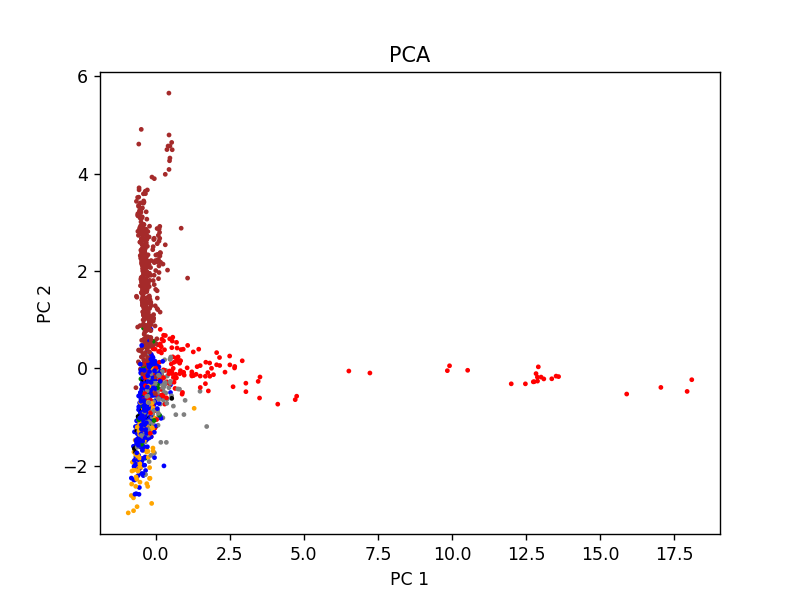

In [8]:
%matplotlib notebook
components, pca = display_data_with_colors(data,method_num=1, dims=2, plot_kwargs=plot_setting) #pca
#display_data_with_colors(data,method_num=1, dims=2, doScale=True, plot_kwargs=plot_setting) #scaled

<IPython.core.display.Javascript object>


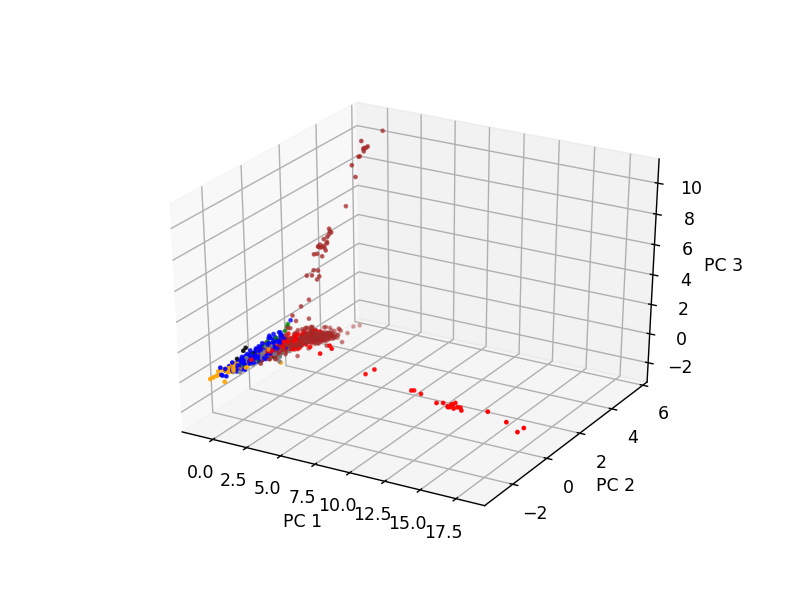

In [9]:
components, pca = display_data_with_colors(data,method_num=1, dims=3, plot_kwargs=plot_setting) #pca
#display_data_with_colors(data,method_num=1, dims=3, doScale=True, plot_kwargs=plot_setting) #pca

<IPython.core.display.Javascript object>


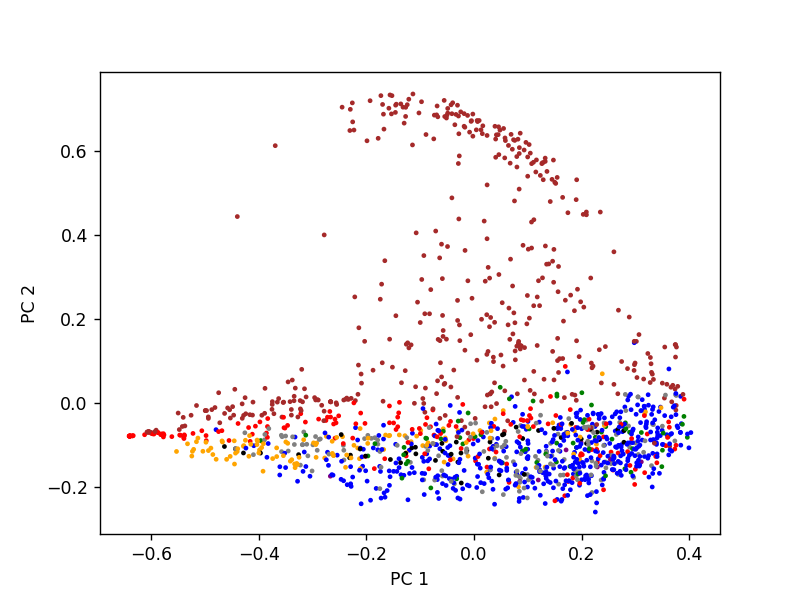

In [10]:
components, kpca = display_data_with_colors(data,method_num=2, dims=2,plot_kwargs=plot_setting) #kernel pca
#display_data_with_colors(data,method_num=2, dims=2, doScale=True, plot_kwargs=plot_setting) #scaled

<IPython.core.display.Javascript object>


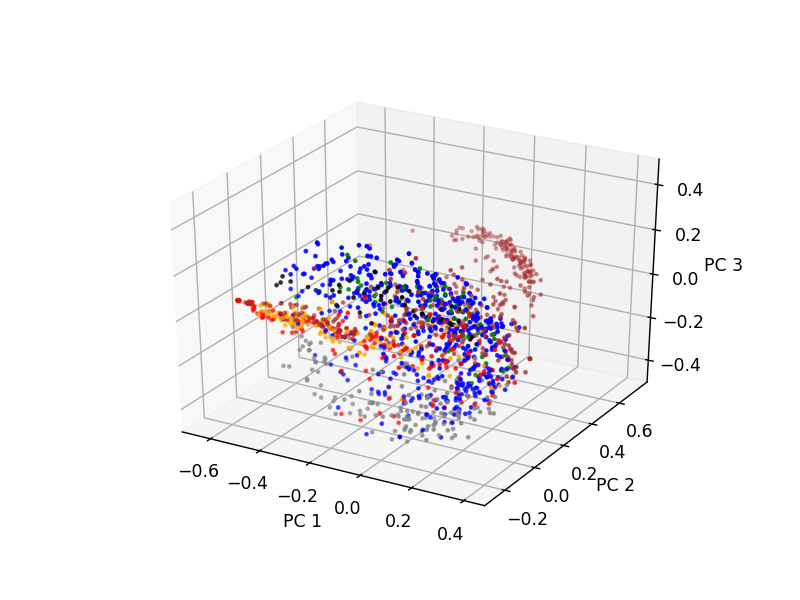

In [11]:
components, kpc = display_data_with_colors(data,method_num=2, dims=3, plot_kwargs=plot_setting) #kernel pca
#display_data_with_colors(data,method_num=2, dims=3, doScale=True, plot_kwargs=plot_setting) #kernel pca

<IPython.core.display.Javascript object>


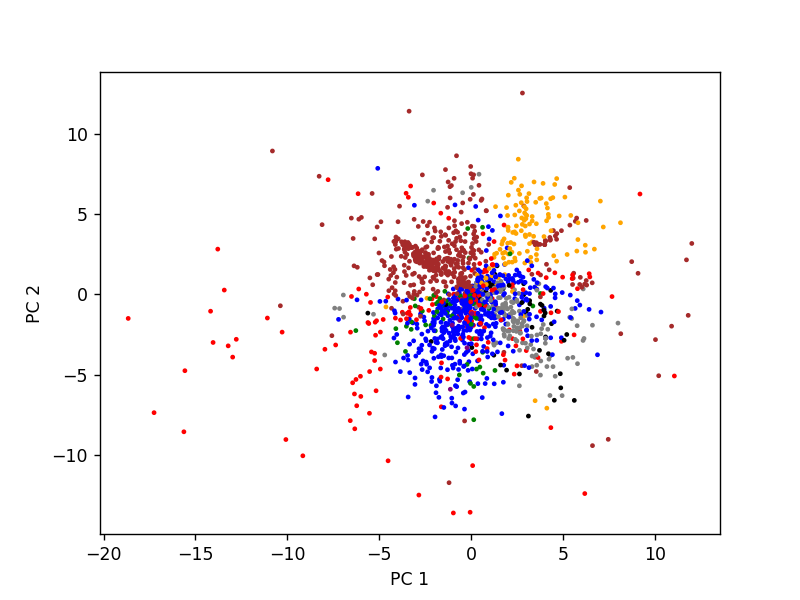

In [12]:
components, mds = display_data_with_colors(data,method_num=3, dims=2,plot_kwargs=plot_setting) #mds
#display_data_with_colors(data,method_num=3, dims=2,doScale=True,plot_kwargs=plot_setting) #scaled

<IPython.core.display.Javascript object>


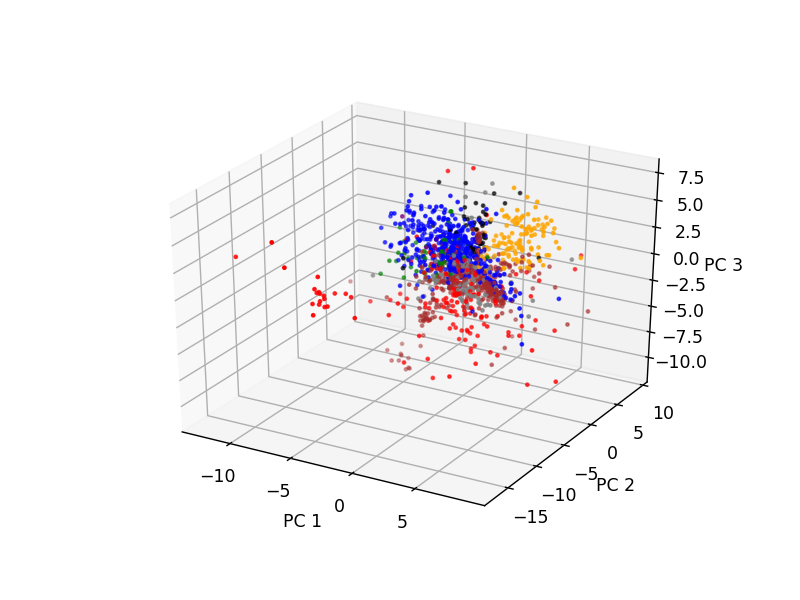

In [13]:
components, mds = display_data_with_colors(data,method_num=3, dims=3, plot_kwargs=plot_setting) #mds
#display_data_with_colors(data,method_num=3, dims=3, doScale=True, plot_kwargs=plot_setting) #scaled

<IPython.core.display.Javascript object>


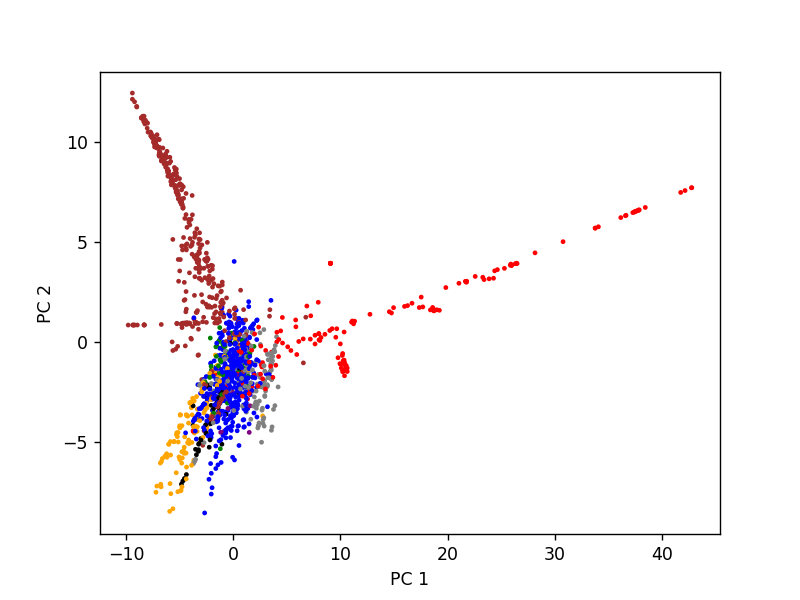

In [14]:
components, isomap = display_data_with_colors(data,method_num=4, dims=2,plot_kwargs=plot_setting) #isomap
#display_data_with_colors(data,method_num=4, dims=2,doScale=True, plot_kwargs=plot_setting) #scaled

<IPython.core.display.Javascript object>


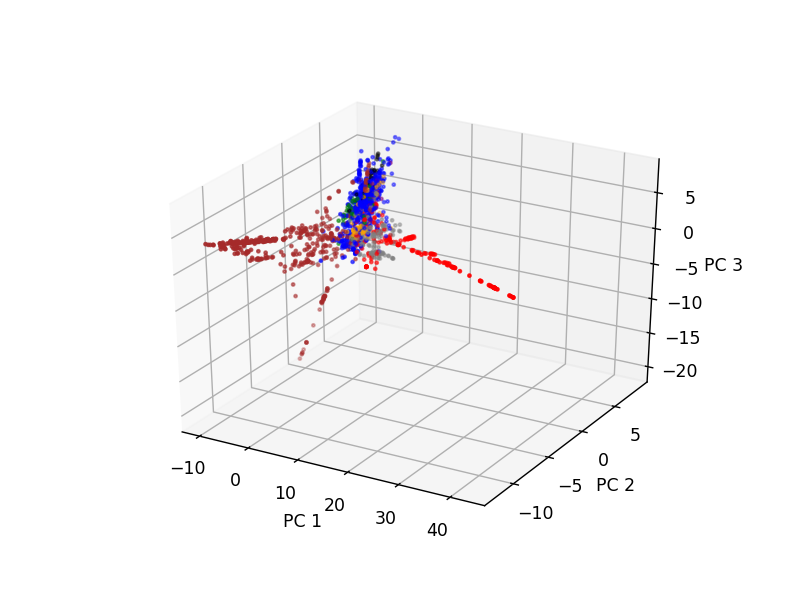

In [15]:
components, isomap = display_data_with_colors(data,method_num=4, dims=3, plot_kwargs=plot_setting) #isomap
#display_data_with_colors(data,method_num=4, dims=3, doScale=True, plot_kwargs=plot_setting) #scaled

<IPython.core.display.Javascript object>


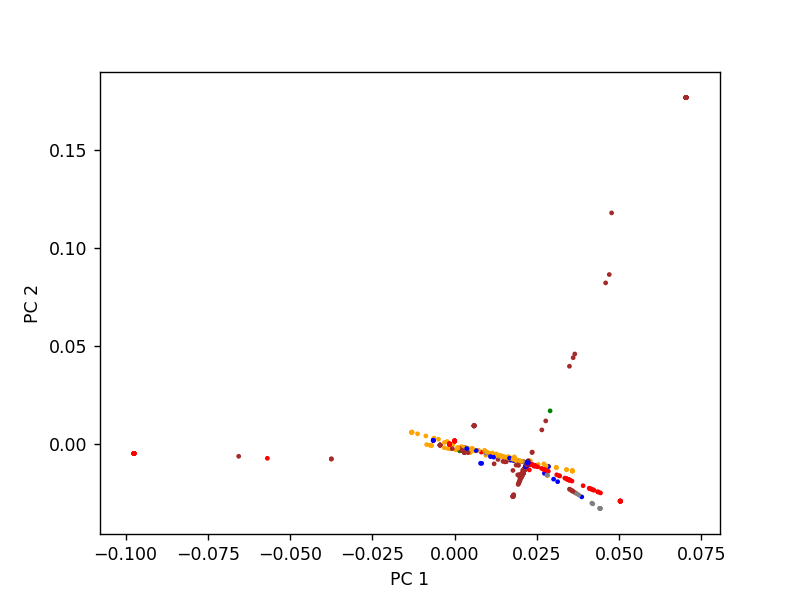

In [16]:
components, lle = display_data_with_colors(data,method_num=5, dims=2,plot_kwargs=plot_setting) #lle

<IPython.core.display.Javascript object>


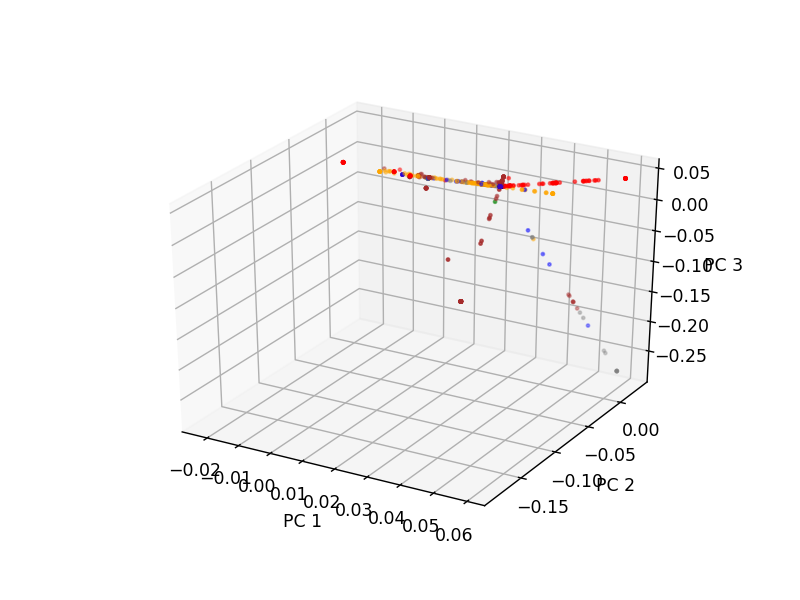

In [17]:
components, lle = display_data_with_colors(data,method_num=5, dims=3, plot_kwargs=plot_setting) #lle

# K nearest neighbours

In [18]:
def knn_stats(samples, labels, n_neighbours):
    nbrs = NearestNeighbors(n_neighbours, algorithm='brute').fit(samples)
    distances, indices = nbrs.kneighbors(samples)
    
    neighbour_stats = []
    
    for index, neighbours in enumerate(indices):
        same_cluster_neighbours = filter(
            lambda neighbour: labels[neighbour] == labels[index],
            neighbours
        )
        neighbour_stats.append(len(list(same_cluster_neighbours)))
        
    return neighbour_stats

In [19]:
components_pca, pca = perform_pca(data, 2)
components_kpca, kpca = perform_kernel_pca(data, 2)
components_mds, mds = perform_mds(data, 2)
components_iso, iso = perform_isomap(data, 2, 5)
components_lle, lle = perform_lle(data, 5, 2)

In [20]:
nbors = 500
stats = knn_stats(components_pca, class_list, nbors)
print('pca: ', np.mean(stats), 'out of ', nbors, ' neighbors')

stats = knn_stats(components_kpca, class_list, nbors)
print('kpca: ', np.mean(stats), 'out of ', nbors, ' neighbors')

stats = knn_stats(components_mds, class_list, nbors)
print('mds: ', np.mean(stats), 'out of ', nbors, ' neighbors')

stats = knn_stats(components_iso, class_list, nbors)
print('isomap: ', np.mean(stats), 'out of ', nbors, ' neighbors')

stats = knn_stats(components_lle, class_list, nbors)
print('lle: ', np.mean(stats), 'out of ', nbors, ' neighbors')

pca:  500.0 out of  500  neighbors
kpca:  500.0 out of  500  neighbors
mds:  500.0 out of  500  neighbors
isomap:  500.0 out of  500  neighbors
lle:  500.0 out of  500  neighbors
